<a id="1"></a> 
## Correlation
<a id="1-1"></a>
### What is correlation?
Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

For example, two variables which are linearly dependent (say, **x** and **y** which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2)
<a id="1-2"></a>
### How does correlation help in feature selection?
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### Loading the dataset

In [3]:
data = pd.read_csv('Datasets/Data_for_Correlation.csv')

In [4]:
data.head()

,X1,X2,X3,X4,Y
0,1,1,4,-2,1
1,2,4,5,-4,1
2,3,9,6,3,0
3,4,16,7,4,0
4,5,25,8,25,1


Removing the Class Label entry (Y)

In [5]:
data = data.iloc[:,:-1]
data.head()

,X1,X2,X3,X4
0,1,1,4,-2
1,2,4,5,-4
2,3,9,6,3
3,4,16,7,4
4,5,25,8,25


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      14 non-null     int64
 1   X2      14 non-null     int64
 2   X3      14 non-null     int64
 3   X4      14 non-null     int64
dtypes: int64(4)
memory usage: 576.0 bytes


<a id="3-2"></a>
## Selecting features based on correlation
Generating the correlation matrix

In [7]:
corr = data.corr()
corr.head()

,X1,X2,X3,X4
X1,1.000000,0.972714,1.000000,0.263266
X2,0.972714,1.000000,0.972714,0.163575
X3,1.000000,0.972714,1.000000,0.263266
X4,0.263266,0.163575,0.263266,1.000000


Generating the correlation heatmap

<AxesSubplot:>

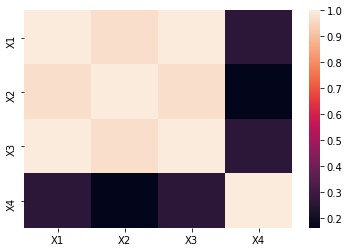

In [8]:
sns.heatmap(corr)

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [9]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [10]:
selected_columns = data.columns[columns]
selected_columns.shape

(2,)

In [11]:
data = data[selected_columns]
print(data)

    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1
